# Password Strength Checker using Python (Random Forest Classifier)

#### Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
import warnings
warnings.filterwarnings('ignore')

#### Uploading Dataset

In [2]:
df = pd.read_csv('password data.csv',error_bad_lines  = False, warn_bad_lines = False)
df.head()

,password,strength
0,kzde5577,1
1,kino3434,1
2,visi7k1yr,1
3,megzy123,1
4,lamborghin1,1


In [3]:
df.sample(20)

,password,strength
533710,blipjan159,1
387109,BYNUM7906,1
665713,jJQo9RDk1OAJpHMs,2
543993,puzzi123lol,1
590951,PVjtuKDAyMQI2h13,2
551629,ceruk996,1
364667,alohomora08,1
513270,C17HZ7DU4OAljRVs,2
453331,mehedi127144,1
650023,YogHemalChalis26,2


In [4]:
df.tail(7)

,password,strength
669633,lanciau01,1
669634,sh4tup,0
669635,10redtux10,1
669636,infrared1,1
669637,184520socram,1
669638,marken22a,1
669639,fxx4pw4g,1


-- Note that, the dataset have two columns "password" and "strength".

In "strength" column, 
- 0 means: the password’s strength is weak.
- 1 means: the password’s strength is medium.
- 2 means: the password’s strength is strong.

In [5]:
df.shape

(669640, 2)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 669640 entries, 0 to 669639
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   password  669639 non-null  object
 1   strength  669640 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 10.2+ MB


### Data Preprocessing - EDA and Visualization

In [7]:
# Checking null values

df.isnull().sum()          # password column has only one null value. Deleting it.

password    1
strength    0
dtype: int64

In [8]:
df[df['password'].isna()]

,password,strength
367579,NaN,0


In [9]:
df = df.dropna()
df.shape

(669639, 2)

In [10]:
# Converting 0 into "weak", 1 into "medium" and 2 into "strong"

df = df.dropna()
df['strength'] = df['strength'].map({0 : 'Weak', 1 : 'Medium', 2 : 'Strong'})
df.head(6)

,password,strength
0,kzde5577,Medium
1,kino3434,Medium
2,visi7k1yr,Medium
3,megzy123,Medium
4,lamborghin1,Medium
5,AVYq1lDE4MgAZfNt,Strong


#### Plotting the count of Passowrd Categories ("weak", "medium", "strong")

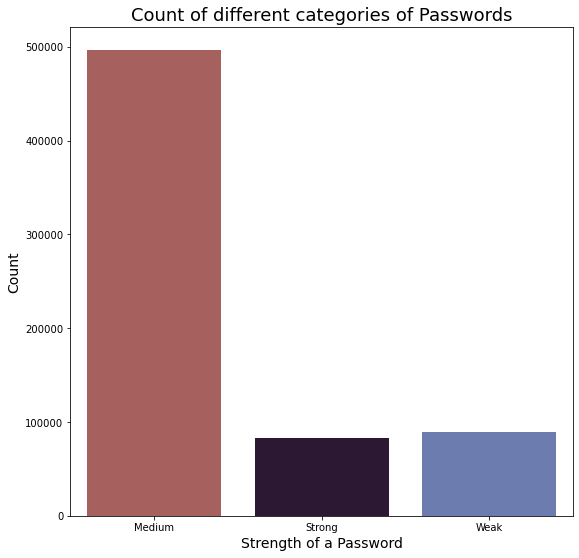

In [11]:
plt.figure(figsize=(9,9))
sns.countplot(data = df, x = 'strength', palette= 'twilight_r')

plt.title("Count of different categories of Passwords", fontdict= {'fontsize': 18})
plt.xlabel("Strength of a Password",fontdict= {'fontsize': 14})
plt.ylabel("Count",fontdict= {'fontsize': 14})
plt.show()

### Password Strength Prediction Model

we need to tokenize the passwords as we need the model to learn from the combinations of digits, letters, and symbols to predict the password’s strength.

In [12]:
def word(password):
    character = []
    for i in password:
        character.append(i)
    return character

In [13]:
# Seperating input and output variables

X = df['password']  # Input variable
Y = df['strength']  # Output variable

#### Applying tokenizer on Input Data

In [14]:
tfidf = TfidfVectorizer(tokenizer=word)
X = tfidf.fit_transform(X)
X

<669639x153 sparse matrix of type '<class 'numpy.float64'>'
	with 5645406 stored elements in Compressed Sparse Row format>

#### Importing train-test split

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [17]:
X.shape, X_train.shape, X_test.shape

((669639, 153), (535711, 153), (133928, 153))

In [18]:
Y_train.value_counts().sort_index(0)

Medium    397282
Strong     66636
Weak       71793
Name: strength, dtype: int64

#### Observation - Data Imbalance

The count of passwords in training set with "medium" strength is far more than password with strength "weak" and "strong".
This is case of "class imbalanced problem".
To deal with this, applying statistical tools i.e. "SMOTE Analysis"

In [19]:
# pip install imblearn

In [20]:
from imblearn.over_sampling import SMOTE

In [21]:
pip install threadpoolctl==3.1.0

Note: you may need to restart the kernel to use updated packages.


In [22]:
sm = SMOTE()

In [23]:
X_train1, Y_train1 = sm.fit_resample(X_train, Y_train)

In [24]:
Y_train1.value_counts()

Strong    397282
Medium    397282
Weak      397282
Name: strength, dtype: int64

#### Importing Random Forest Classifier

In [25]:
from sklearn.ensemble import RandomForestClassifier

In [26]:
RF = RandomForestClassifier()

In [27]:
RF.fit(X_train1, Y_train1)

RandomForestClassifier()

In [28]:
RF_pred = RF.predict(X_test)

In [29]:
RF_pred[:7]

array(['Medium', 'Medium', 'Strong', 'Medium', 'Medium', 'Weak', 'Medium'],
      dtype=object)

In [30]:
Y_test[:7]

619384    Medium
337537    Medium
446014    Strong
597717    Medium
398531    Medium
493635      Weak
561453    Medium
Name: strength, dtype: object

In [31]:
# Y_train1.value_counts()

##### Creating dataframe for comparing actual test data values and predicted test data values

In [32]:
df_compare = pd.DataFrame({"Y_test (actual)" :Y_test,
                           "RF_pred (predicted)" :RF_pred})

In [33]:
df_compare[:50]

,Y_test (actual),RF_pred (predicted)
619384,Medium,Medium
337537,Medium,Medium
446014,Strong,Strong
597717,Medium,Medium
398531,Medium,Medium
493635,Weak,Weak
561453,Medium,Medium
507139,Medium,Medium
11419,Weak,Weak
303509,Medium,Medium


In [34]:
# Importing the accuracy score

from sklearn.metrics import accuracy_score 

In [35]:
accuracy_score(Y_test, RF_pred).round(2)

0.95

In [36]:
# Score

print(RF.score(X_test, Y_test))

0.9458589689982677


#### Ploting the predicted and actual output

<AxesSubplot:title={'center':'Predicted Values'}>

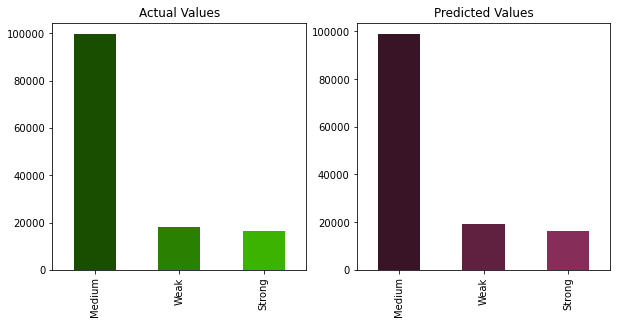

In [37]:
plt.figure(figsize= (10,10))

plt.subplot(2,2,1)
df_compare['Y_test (actual)'].value_counts().plot.bar(color = ['#194d00', '#2a8000', '#3bb300'], title = "Actual Values")

plt.subplot(2,2,2)
df_compare['RF_pred (predicted)'].value_counts().plot.bar(color = ['#391326', '#602040', '#862d59'], title = "Predicted Values")

### Predictive System

In [38]:
import getpass

In [42]:
user = getpass.getpass("Please enter your password:")
    
data = tfidf.transform([user]).toarray()

Please enter your password:········


In [43]:
output = RF.predict(data)

In [46]:
if output == 'Weak':
    print("\033[1m"+"Password strength is too weak, please try another one! :)")
elif output == 'Medium':
    print("\033[1m"+"Hey your password strength is Medium, you can try another one!")
elif output == 'Strong':
    print("\033[1m"+"Strong Password, just like you ;)")

Password strength is too weak, please try another one! :)
